In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")

from xlstm_scaling_laws.model_accounting.inference_time_model.generic import roofline_model, roofline_model_logsumexp

In [2]:


ai = np.linspace(0, 500, 100)

alpha = 900e12
beta = 3.35e12

rhos = [1e-12, 3e-14, 1e-14, 5e-15, 2.5e-15, 1e-15] #np.linspace(1e-10, 1e-15, 3)
# rhos = [0.001, 10]
att_flops_roofline = roofline_model(arithmetic_intensity=ai, alpha=alpha, beta=beta)
att_flops_roofline_logsumexp = {}
for rho in rhos:
    # Calculate the roofline model for the given rho
    # This is a simplified version of the rooflines model
    # where we assume a linear relationship between AI and FLOPs
    # based on the alpha and beta parameters.
    att_flops_roofline_logsumexp[str(rho)] = roofline_model_logsumexp(arithmetic_intensity=ai, alpha=alpha, beta=beta, rho=rho)

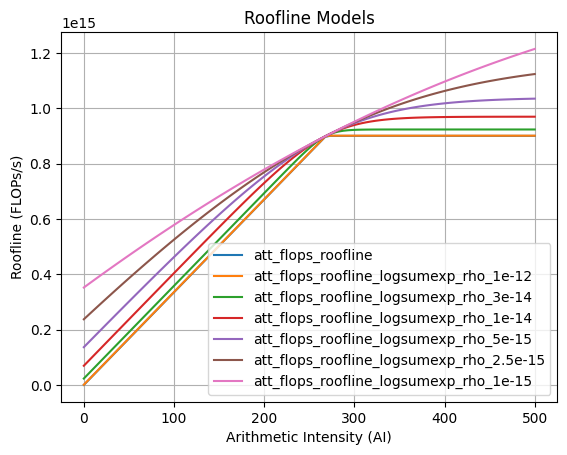

In [3]:
plt.plot(ai, att_flops_roofline, label="att_flops_roofline")
for rho, flops in att_flops_roofline_logsumexp.items():
    plt.plot(ai, flops, label=f"att_flops_roofline_logsumexp_rho_{rho}")
plt.xlabel("Arithmetic Intensity (AI)")
plt.ylabel("Roofline (FLOPs/s)")
plt.title("Roofline Models")
plt.legend()
plt.grid()
plt.show()